Fandango仍在夸大评级吗？

2015年10月，FiveThirtyEight的Walt Hickey发表了一篇受欢迎的文章，他提供了有力的证据，表明Fandango的电影评分系统存在偏见且不诚实。 在此项目中，我们将分析最近的电影收视率数据，以确定经过Hickey分析后的Fandango收视率系统是否发生了任何变化。

了解数据
我们将使用两个电影等级样本：一个样本中的数据是在Hickey分析之前收集的，而另一个样本是在Hickey分析之前收集的。 让我们开始阅读两个示例（它们存储为CSV文件）并熟悉它们的结构。

In [68]:
import pandas as pd
import numpy as np
import os
os.chdir('E:/学习资料/python数据分析/dataquest/第五单元/项目一/')
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

import matplotlib.pyplot as plt
% matplotlib inline  

In [25]:
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

下面，我们仅隔离提供有关Fandango信息的列，因此我们使相关数据更易于使用，以供以后使用。 我们将进行复制以避免以后出现任何SettingWithCopyWarning。

In [32]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

经过Hickey的分析，我们的目标是确定Fandango的评分系统是否发生任何变化。我们分析的兴趣人群是由Fandango网站上存储的所有电影收视率构成的，与发行年份无关。

因为我们想了解在Hickey分析之后该总体的参数是否发生了变化，所以我们有兴趣在Hickey分析之前和之后的两个不同时间段对总体进行抽样，因此我们可以比较这两个状态。

我们正在使用的数据是在需要的时候进行采样的：一个采样是在分析之前进行的，另一个采样是在分析之后进行的。我们要描述总体，因此我们需要确保样本具有代表性，否则我们应该预期会有较大的抽样误差，并最终得出错误的结论。

从Hickey的文章以及数据集存储库的README.md中，我们可以看到他使用了以下采样标准：

采样时（2015年8月24日），电影必须在Fandango的网站上获得至少30个粉丝评分。
这部电影一定在2015年有售票。
采样显然不是随机的，因为并非每部电影都有相同的机会被包括在样本中-有些电影根本没有机会（例如那些影迷评级低于30的电影或2015年没有售票的电影）。值得怀疑的是，该样本是否代表了整个人口群体。似乎更有可能不是，主要是因为此样本受时间趋势的影响-例如与其他年份相比，2015年的电影可能表现出色或不好。

我们其他样本的采样条件为（可以在数据集存储库的README.md中读取）：

电影必须在2016年或之后发行。
这部电影必须有相当多的票数和评论（不清楚README.md或数据中有多少票）。
第二个样本也受时间趋势的影响，不太可能代表我们感兴趣的人群。

这两位作者在对数据进行采样时都会想到某些研究问题，并且他们使用一组标准来获取适合其问题的样本。他们的抽样方法称为目的抽样（或判断性/选择性/主观抽样）。尽管这些样本足以用于他们的研究，但对我们来说似乎并没有太大用处。

改变我们的分析目标
此时，我们既可以收集新数据，也可以更改我们的分析目标。我们选择后者，并对我们的最初目标施加一些限制。

我们的新目标不是要确定经过Hickey分析之后的Fandango分级系统是否发生变化，而是要确定Fandango在2015年流行电影中的收视率与Fandango在2016年流行电影中的收视率之间是否存在任何差异。也可以很好地代表我们的最初目标。

分离我们需要的样品
有了这个新的研究目标，我们有两个感兴趣的人群：

所有Fandango对2015年发行的流行电影的评分。
所有Fandango对2016年发行的流行电影的评级。
我们需要弄清什么才是流行电影。我们将使用Hickey的30个粉丝评级基准，并仅在Fandango网站上将其评为30或更高的电影才算受欢迎。

尽管第二个样本中的抽样标准之一是电影受欢迎程度，但该样本未提供有关风扇额定值数量的信息。我们应该再次持怀疑态度，并询问该示例是否真正具有代表性并包含受欢迎的电影（拥有30多个风扇评级的电影）。

检查此样本代表性的一种快速方法是从样本中随机抽取10部电影，然后在Fandango网站上自行检查粉丝等级的数量。理想情况下，每10部电影中至少有8部具有30或更高的风扇额定值。

In [55]:
fandango_after_sample = fandango_after.sample(10,random_state = 1)
fandango_after_sample 

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


在上面，我们使用值1作为随机种子。 这是一个好习惯，因为它表明我们并不是为了获得满意的样本而尝试各种随机种子。

截至2018年4月，这些是我们发现的粉丝等级：
                                  
Mechanic: Resurrection	2247

Warcraft	7271

Max Steel	493

Me Before You	5263

Fantastic Beasts and Where to Find Them	13400

Cell	17

Genius	127

Sully	11877

A Hologram for the King	500

Captain America: Civil War	35057

我们样本中的电影中有90％受欢迎。 这已经足够，我们充满信心地前进。

我们还要仔细检查流行电影的其他数据集。 该文档清楚地指出，只有电影的风扇额定值至少为30，但在这里只需几秒钟即可仔细检查。

In [60]:
fandango_previous_min_votes = fandango_previous['Fandango_votes'].min()
#在先前的研究中，该样本具备代表性，其电影评论最小值为35


#隔离出2015与2016的数据
fandango_2015 = fandango_previous[fandango_previous['FILM'].str.contains('2015')]
fandango_2016 = fandango_after[fandango_after['year'] == 2016]

比较2015年和2016年的分布形状
我们的目的是弄清Fandango在2015年的热门电影收视率与2016年Fandango在热门电影中的收视率之间是否存在差异。一种解决方法是分析并比较两个样本的电影收视率分布。

我们将从使用核密度图比较两个分布的形状开始。 我们将使用FiveThirtyEight样式进行绘制。

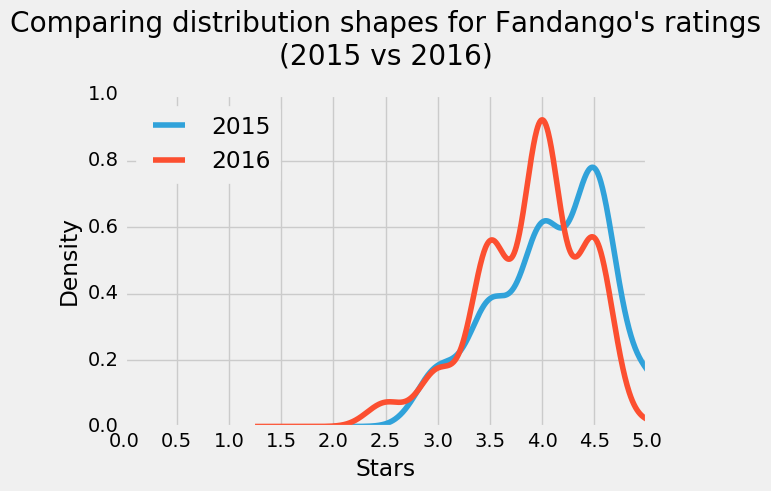

In [80]:
from numpy import arange

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(legend = True,label = 2015,)
fandango_2016['fandango'].plot.kde(legend = True,label = 2016)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

上图中有两个方面很突出：

两种分布都严重偏左。
与2015年的分布相比，2016年的分布稍微向左移动。
左偏表明在Fandango上的电影获得了很高和很高的粉丝评级。再加上Fandango卖票的事实，高收视率有点可疑。对此进行进一步的研究真的很有趣-最好在一个单独的项目中进行，因为这与我们当前分析的目标无关。

对于我们的分析，2016年分布的左移是非常有趣的。它显示2016年的收视率与2015年相比略低。这表明Fandango在2015年的流行电影收视率与Fandango在2016年的流行电影收视率之间确实存在差异。我们还可以看到差异的方向：收视率2016年与2015年相比略有下降。

比较相对频率
到目前为止，似乎我们遵循的是一个很好的线程，但是我们需要分析更详细的信息。让我们检查两个分布的频率表以分析一些数字。由于数据集具有不同数量的电影，因此我们将表格标准化并显示百分比。

In [86]:
fandango_2015_freq = fandango_2015['Fandango_Stars'].value_counts().sort_index()
fandango_2016_freq = fandango_2016['fandango'].value_counts().sort_index()

fandango_2015_freq

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [88]:
fandango_2016_freq

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

与2015年相比，2016年非常高的评分（4.5星和5星）的百分比明显低。2016年，不到1％的电影获得5星的完美评分，而2015年的百分比接近7％。 4.5的评分在2015年也更受欢迎-与2016年相比，2015年的4.5评分电影高出约13％。

最低评级在2016年也更低-2.5颗星而不是3颗星，而2015年为最低。两个频率分布之间显然存在差异。

对于其他一些收视率，该百分比在2016年有所上升。与2015年相比，2016年获得3.5星和4星评级的电影比例更高。3.5和4.0是高收视率，这挑战了我们在电视上看到的变化方向 核密度图。

确定变化方向¶

让我们采用几个汇总指标，以更准确地了解变化的方向。 接下来，我们将计算两种分布的均值，中位数和众数，然后使用条形图绘制值。

In [105]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mod_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mod_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015,median_2015,mod_2015]
summary['2016'] = [mean_2016,median_2016,mod_2016]
summary.index = ['mean','median','mod']

summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mod,4.500000,4.000000


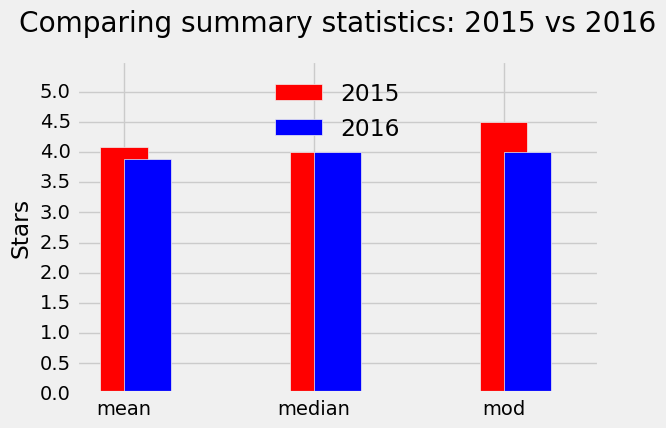

In [117]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'r',label = '2015',legend = True,align = 'center',width = .25)
summary['2016'].plot.bar(color = 'b',label = '2016',legend = True,align = 'edge',width = .25,rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [118]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.048426835689519929

尽管两个分布的中位数相同，但该模式在2016年降低了0.5。 结合我们所看到的平均值，可以确认我们在内核密度图上看到的变化方向：平均而言，2016年发行的流行电影的评分略低于2015年发行的流行电影。

结论
我们的分析表明，Fandango在2015年的热门电影评级与2016年在Fandango的流行电影评级之间确实存在细微的差别。我们还确定，Fandango在2016年发行的流行电影的平均评分低于2015年发行的流行电影 。

我们不能完全确定是什么原因导致了这种变化，但是很有可能是由Fandango在经过Hickey分析之后修正了偏见的评分系统而引起的。